<a href="https://colab.research.google.com/github/jaisonjames0006/ML/blob/main/coronary%20heart%20disease%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings. filterwarnings("ignore")

In [ ]:
# Read the data to a data frame

df=pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
# Check the missing values in the data frame

df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Drop the eductation column which is irrelevant

df.drop(['education'],axis=1,inplace=True)

In [ ]:
# Replace the missing values with mode and median with respect to column

df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0],inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mode()[0],inplace=True)
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

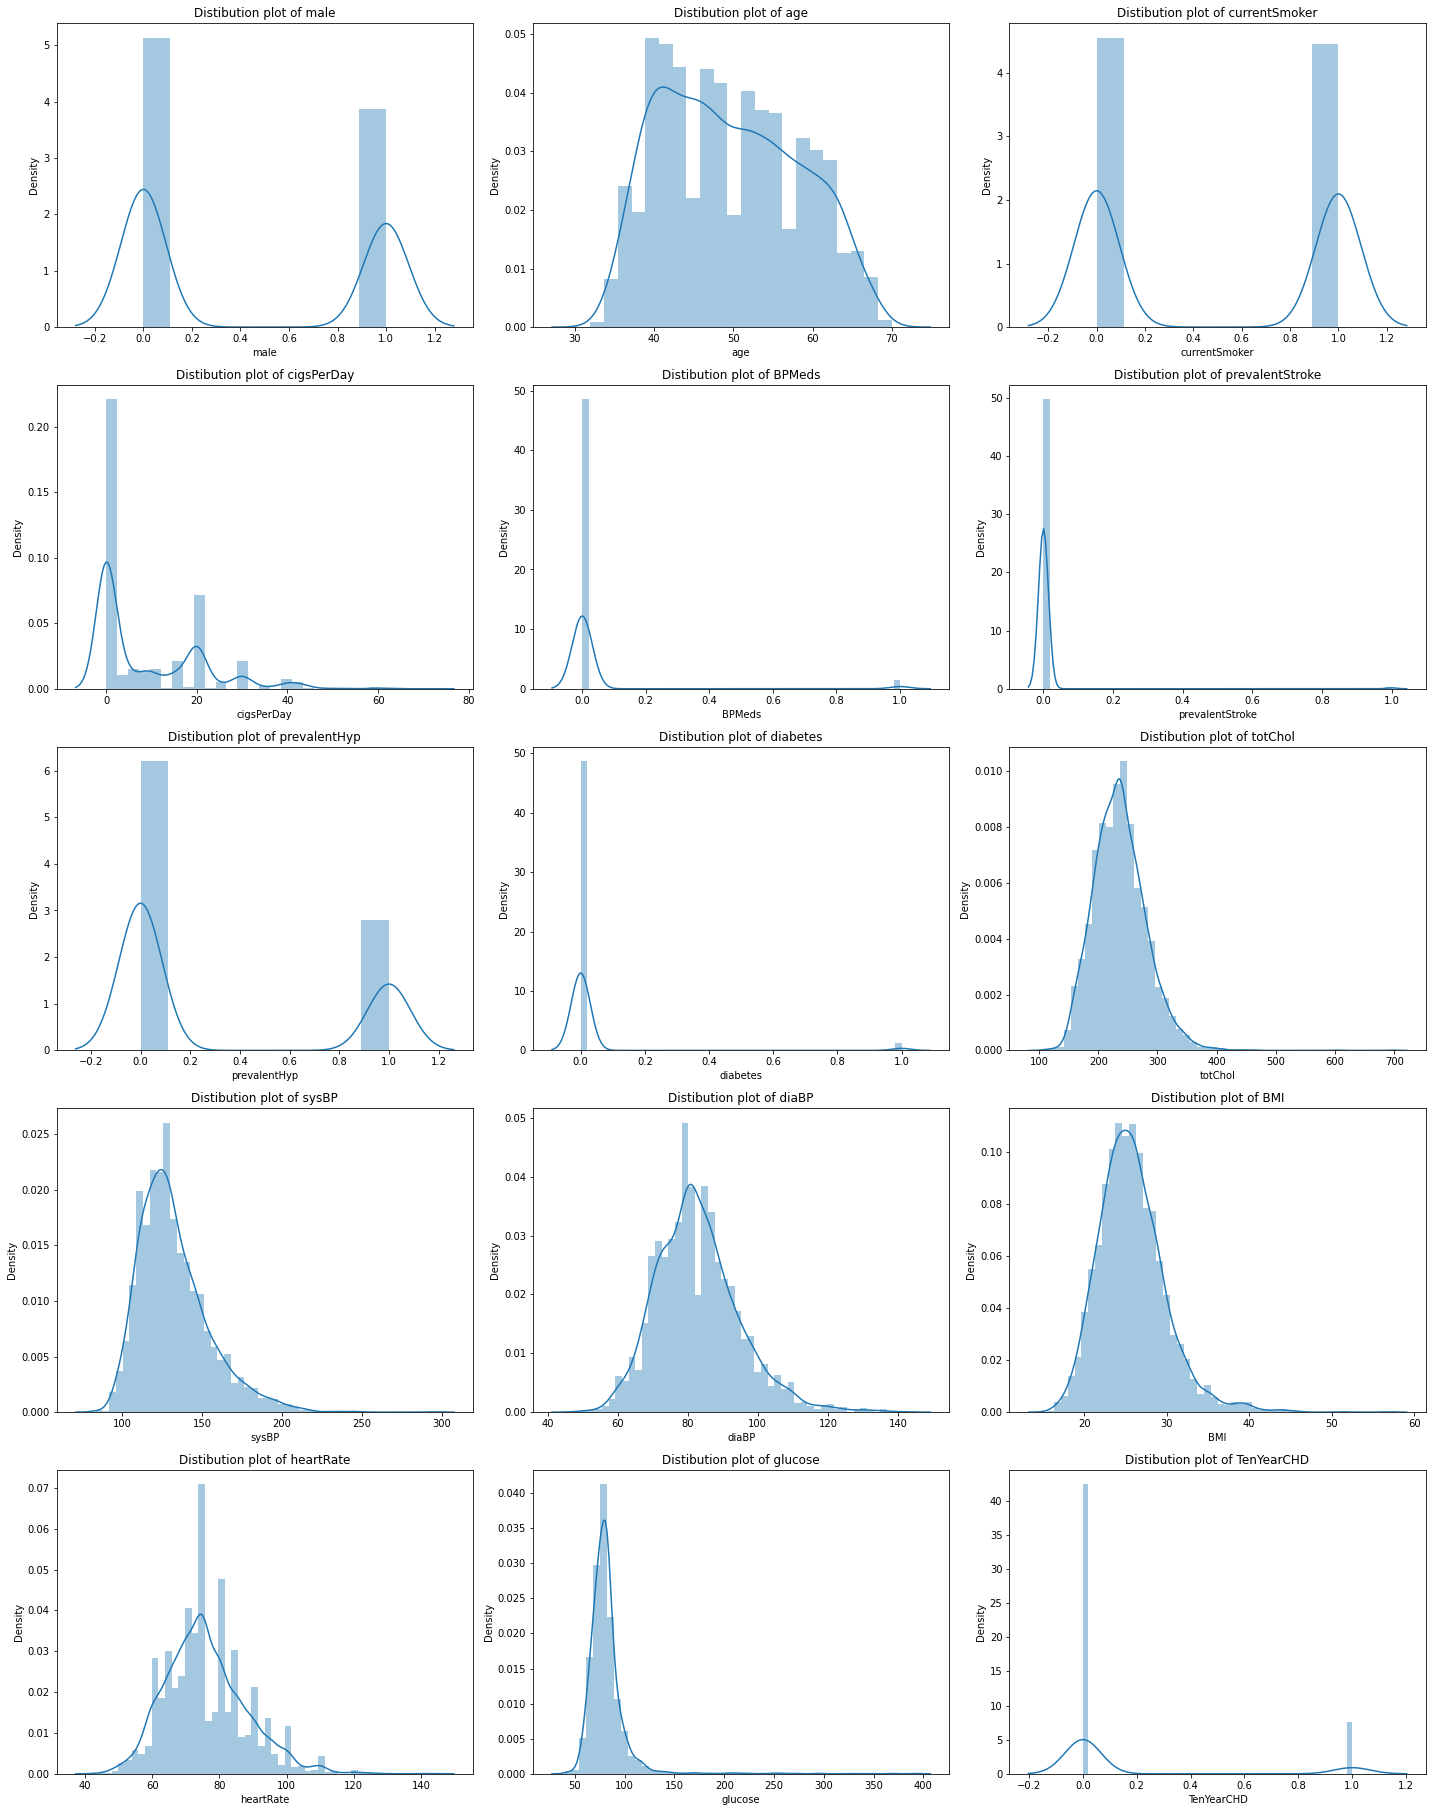

In [ ]:
# Plot the distribution of the neumerical data

plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in df.columns:
  plt.subplot(12,3,plotnumber)
  sns.distplot(df[i])
  plt.title('Distibution plot of {}'.format(i))
  plt.tight_layout()
  plotnumber+=1
plt.show()

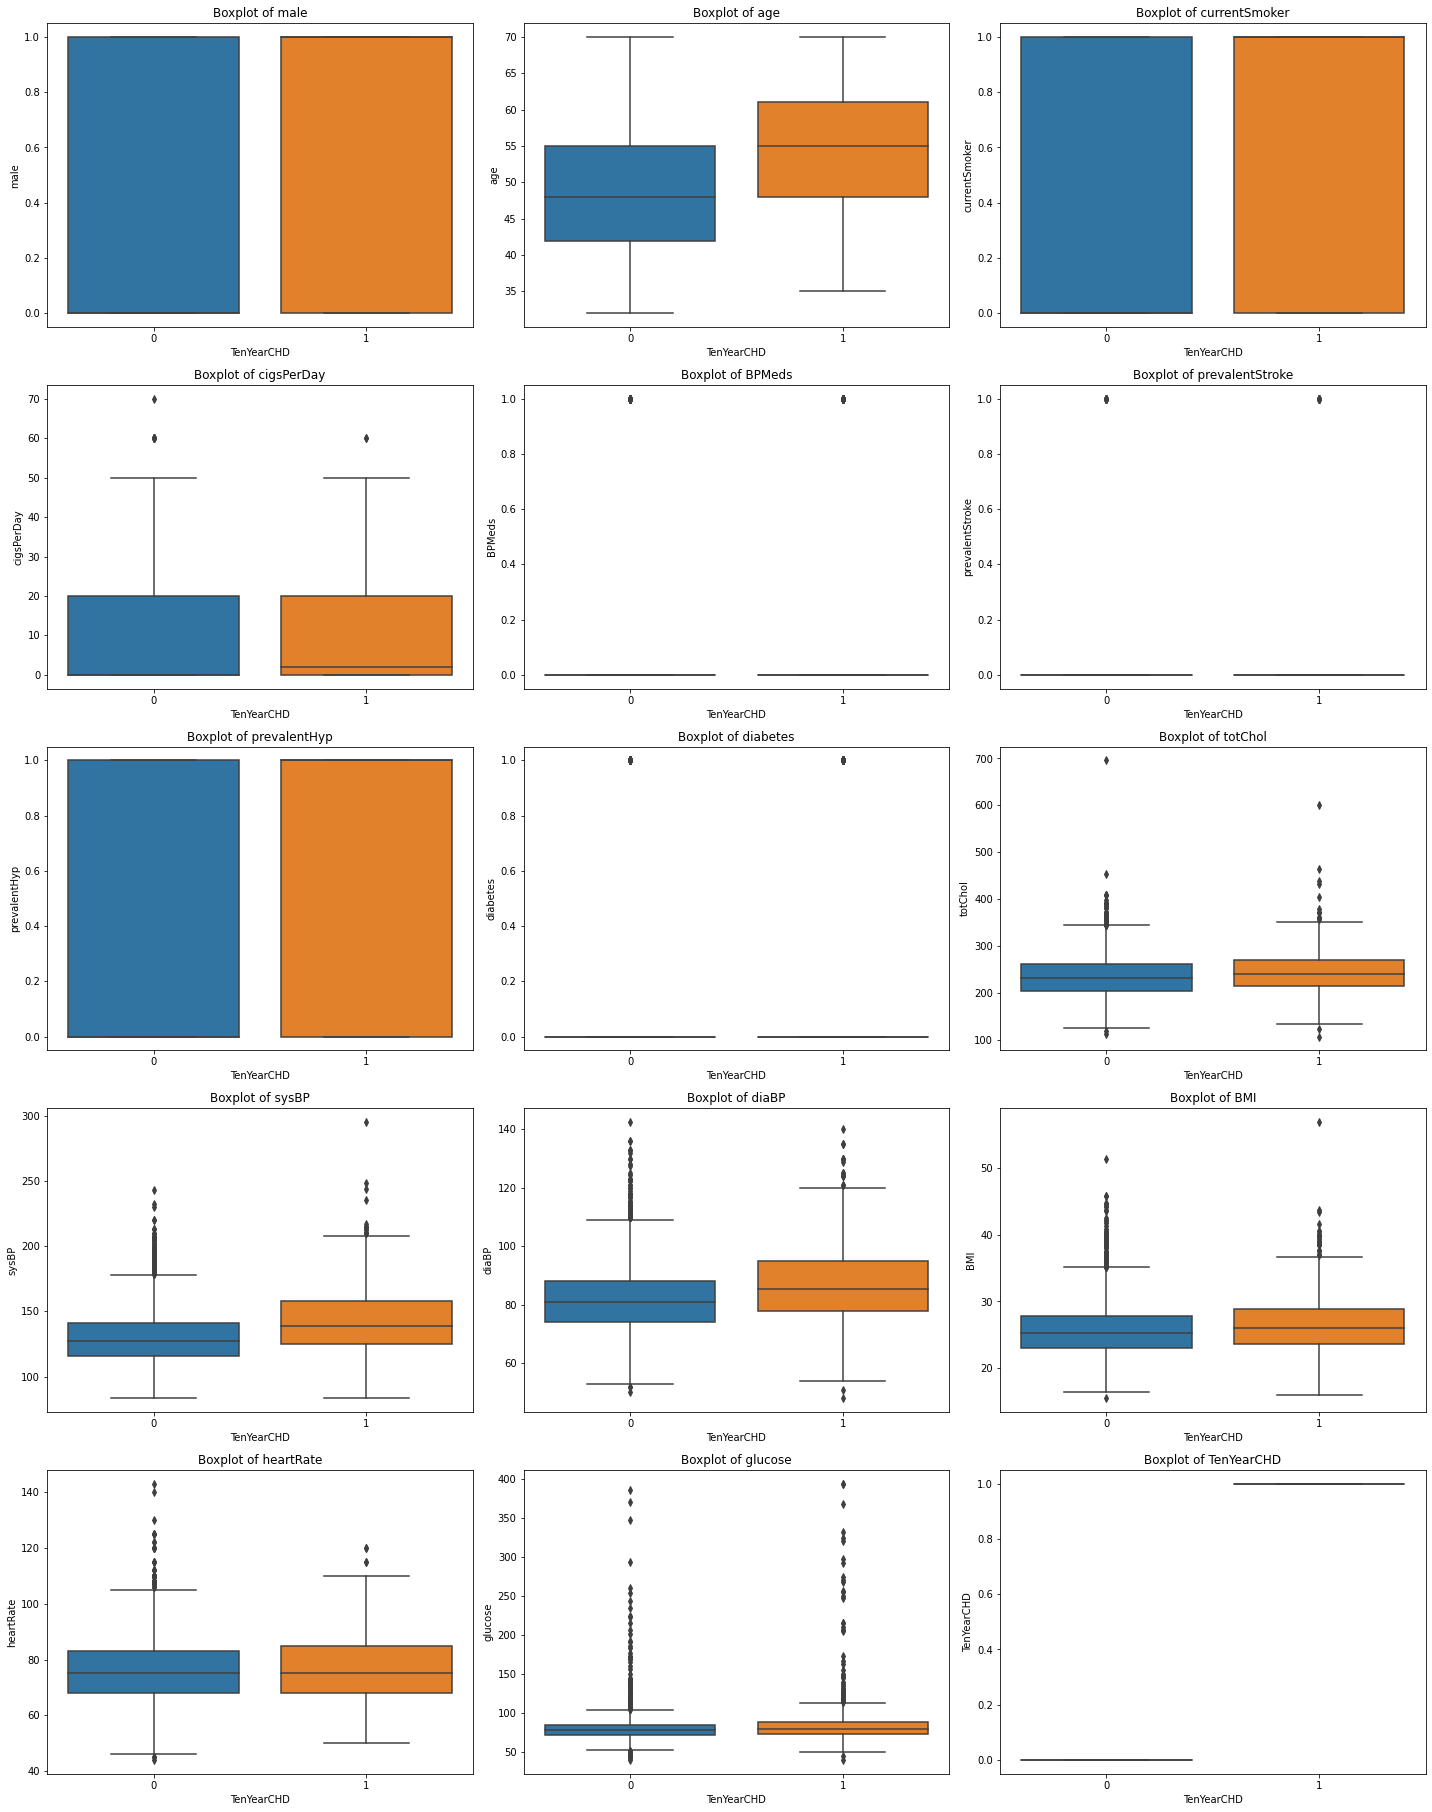

In [ ]:
# Plot the numerical data using boxplot

plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in df.columns:
  plt.subplot(12,3,plotnumber)
  sns.boxplot(x='TenYearCHD',y=df[i],data=df)
  plt.title('Boxplot of {}'.format(i))
  plt.tight_layout()
  plotnumber+=1
plt.show() 
     

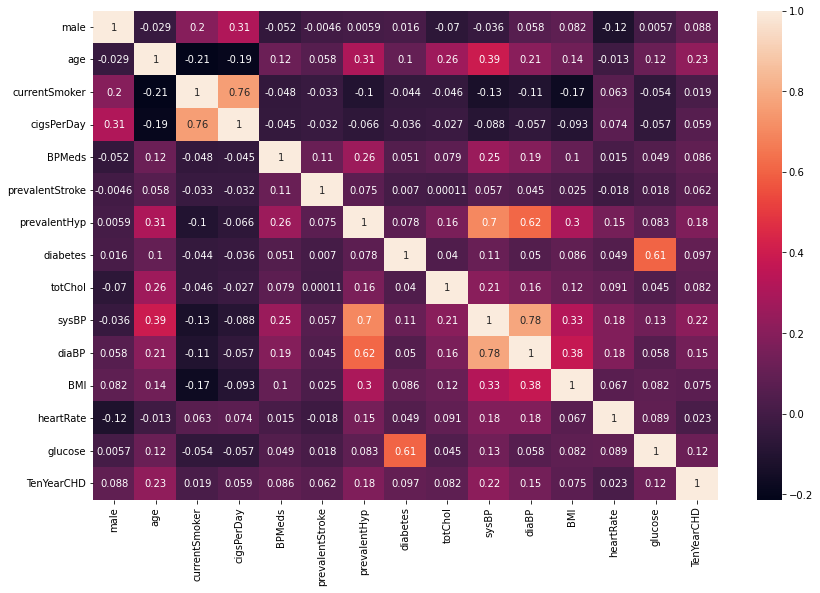

In [ ]:
# Plot the correlation using heat map

fig,ax =plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(),annot=True)

### **Finding outliers in numerical columns using boxplot**

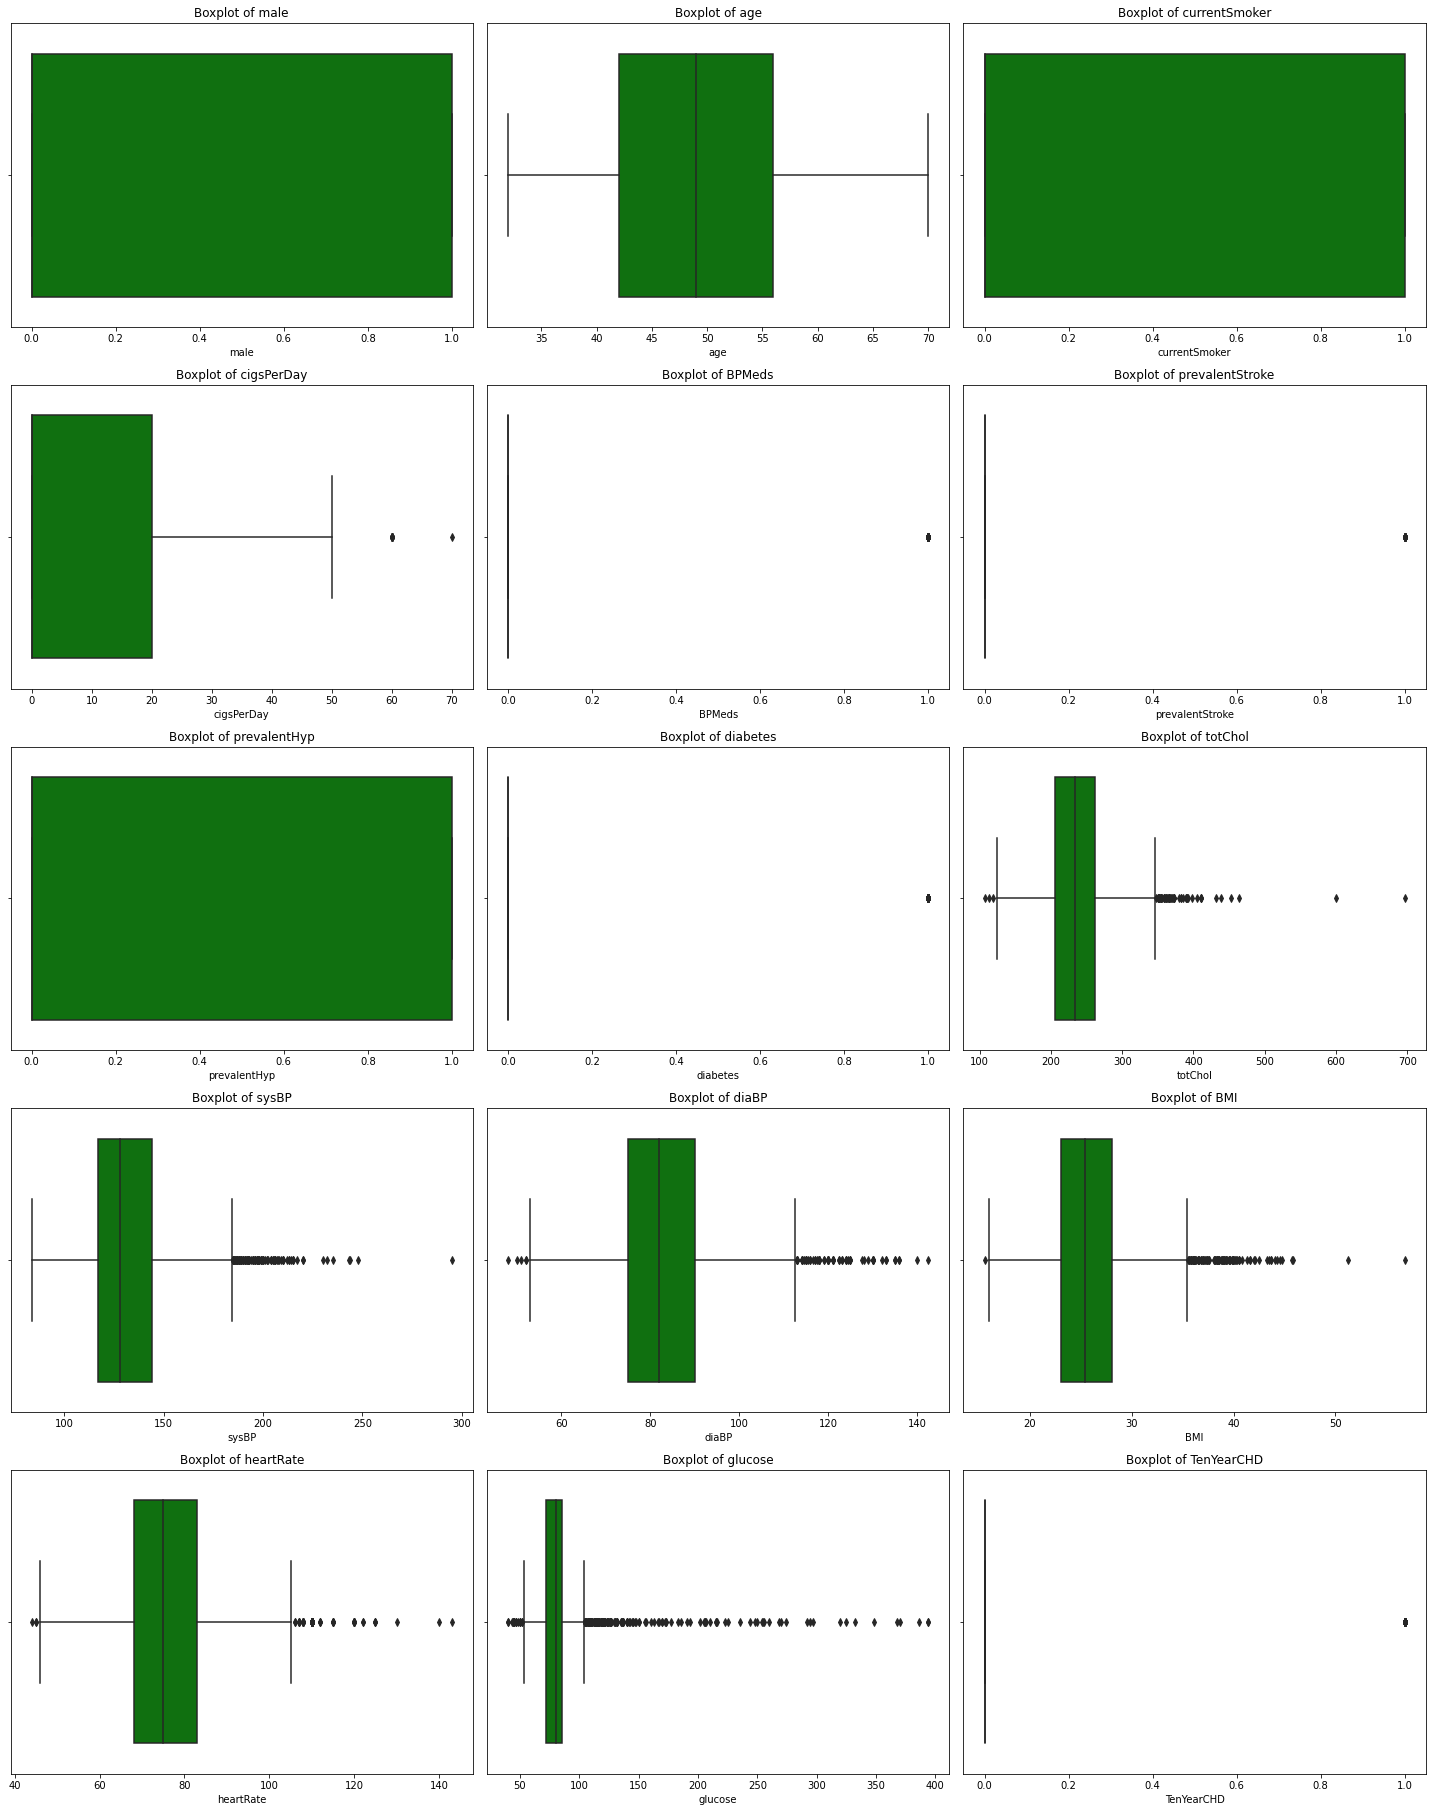

In [ ]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in df.columns:
  plt.subplot(12,3,plotnumber)
  sns.boxplot(df[i],data=df,color='green')
  plt.title('Boxplot of {}'.format(i))
  plt.tight_layout()
  plotnumber+=1
plt.show()

### **REMOVING OUTLIERS USING IQR METHOD**

IQR= Interquartile Range

In [ ]:
outlier_cols=['totChol','sysBP','diaBP','heartRate','glucose','BMI']

****************************************************************************************************
lower_whisker= 122.0
higher_whisker= 346.0


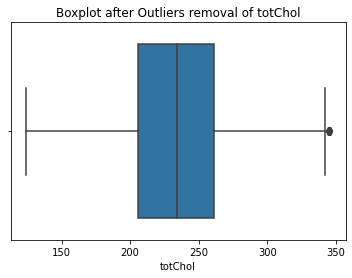

****************************************************************************************************
lower_whisker= 77.25
higher_whisker= 183.25


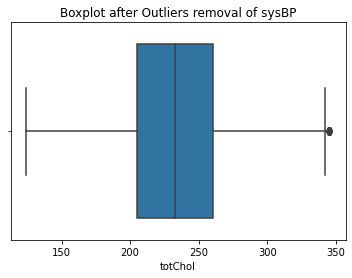

****************************************************************************************************
lower_whisker= 52.25
higher_whisker= 110.25


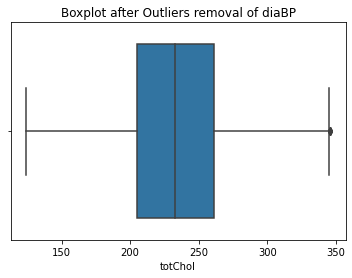

****************************************************************************************************
lower_whisker= 47.0
higher_whisker= 103.0


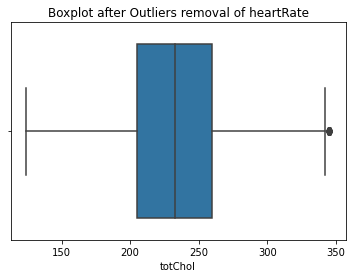

****************************************************************************************************
lower_whisker= 52.5
higher_whisker= 104.5


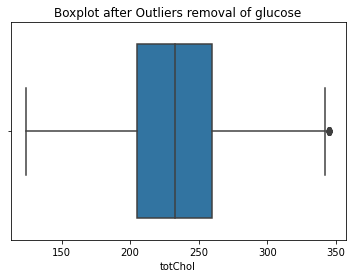

****************************************************************************************************
lower_whisker= 15.7775
higher_whisker= 35.11750000000001


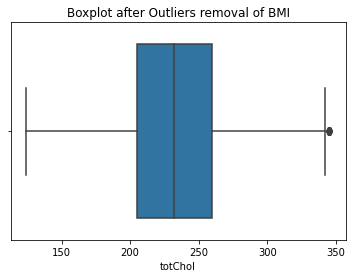

In [ ]:
for i in outlier_cols:
  print('*'*100)
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  print('lower_whisker=',Q1-1.5*IQR)
  print('higher_whisker=',Q3+1.5*IQR)
  balance_outliers_condition = (df[i]>(Q3+1.5*IQR)) | (df[i]<(Q1-1.5*IQR))
  df.drop(df[balance_outliers_condition].index,axis=0,inplace=True)
  sns.boxplot(x=df['totChol'],data=df)
  plt.title('Boxplot after Outliers removal of {}'.format(i))
  plt.show()


In [ ]:
# Shape of the data frame

df.shape

(3631, 15)

In [ ]:
# Target value count

yf.value_counts()

0    3149
1     482
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'TenYearCHD Count')

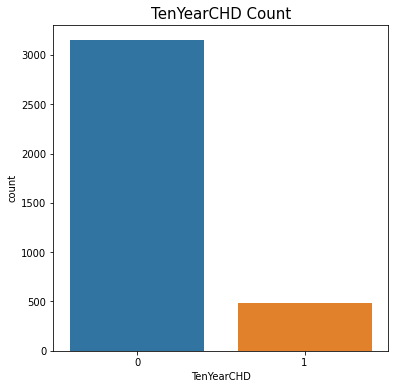

In [ ]:
# Plot the TenYearCHD count in the data 

plt.figure(figsize=(6,6))
sns.countplot(yf)
plt.title('TenYearCHD Count',fontsize=15)

([<matplotlib.patches.Wedge at 0x7f9e253416a0>,
 [Text(-1.0057241134093067, 0.4455547190941466, ''),
  Text(1.0057241134093065, -0.44555471909414723, '')],
 [Text(-0.5485767891323491, 0.2430298467786254, '86.73'),
  Text(0.548576789132349, -0.24302984677862574, '13.27')])

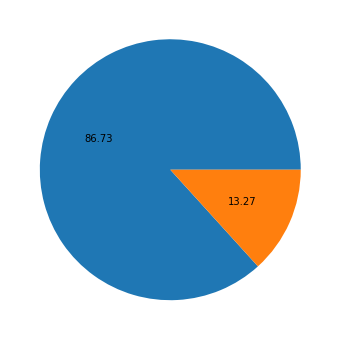

In [ ]:
# Plot the TenYearCHD count in pie chart

plt.figure(figsize=(6,6))
plt.pie(yf.value_counts(),autopct='%0.2f')

### **Feature Selection**

In [ ]:
# Feature Selection
# select the highly depended feature

# correlation

# positive correlation - directly proportional
# negative correlation - inversely proportional
# no correlation - donot depend

In [ ]:
# Split the data to input to perform feature selection

xf=df.iloc[:,:-1]
xf

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000


In [ ]:
# Split the data to target to perform feature selection

yf=df.iloc[:,-1]
yf

0       0
1       0
2       0
3       1
4       0
       ..
4234    0
4235    0
4236    0
4238    0
4239    0
Name: TenYearCHD, Length: 3631, dtype: int64

In [ ]:
# Applying chi2 method in statistics for feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test=SelectKBest(score_func=chi2)
fi=test.fit(xf,yf)
fi.scores_

array([2.09700029e+01, 2.43429824e+02, 1.67753196e+00, 2.60391946e+02,
       8.59848842e+00, 1.51906071e+01, 5.52269117e+01, 1.04382011e-01,
       1.07112364e+02, 2.64872191e+02, 4.45856021e+01, 5.57562726e+00,
       2.55058372e-01, 7.89525223e-02])

In [ ]:
# Display the chi2 score of respective columns

col=xf.columns
score=pd.DataFrame({'feature':col,'score_chi2':fi.scores_})
score

,feature,score_chi2
0,male,20.970003
1,age,243.429824
2,currentSmoker,1.677532
3,cigsPerDay,260.391946
4,BPMeds,8.598488
5,prevalentStroke,15.190607
6,prevalentHyp,55.226912
7,diabetes,0.104382
8,totChol,107.112364
9,sysBP,264.872191


In [ ]:
# sort values according to chi2 score

score.sort_values(by='score_chi2',ascending=False)

,feature,score_chi2
9,sysBP,264.872191
3,cigsPerDay,260.391946
1,age,243.429824
8,totChol,107.112364
6,prevalentHyp,55.226912
10,diaBP,44.585602
0,male,20.970003
5,prevalentStroke,15.190607
4,BPMeds,8.598488
11,BMI,5.575627


In [ ]:
# Display the column names

xf.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [ ]:
# Drop the low chi2 value columns to get the new input

x=xf.drop(['currentSmoker','heartRate','BMI','prevalentStroke','male'],axis=1).values
x

array([[ 39.        ,   0.        ,   0.        , ..., 106.        ,
         70.        ,  77.        ],
       [ 46.        ,   0.        ,   0.        , ..., 121.        ,
         81.        ,  76.        ],
       [ 48.        ,  20.        ,   0.        , ..., 127.5       ,
         80.        ,  70.        ],
       ...,
       [ 44.        ,  15.        ,   0.        , ..., 126.5       ,
         87.        ,  81.96365524],
       [ 40.        ,   0.        ,   0.        , ..., 141.        ,
         98.        ,  72.        ],
       [ 39.        ,  30.        ,   0.        , ..., 133.        ,
         86.        ,  80.        ]])

In [ ]:
y=yf.values
y

array([0, 0, 0, ..., 0, 0, 0])

### **Dimentionality Reduction Using PCA(Principle Component Analysis)**

A PCA is a reduction technique that transforms a high-dimensional data set into a new lower-dimensional data set. At the same time, preserving the maximum amount of information from the original data.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x=pca.fit_transform(x)
x

array([[-2.11732061, -0.01944743,  0.96288604,  0.00796131,  0.41114685],
       [-0.56751824, -0.48987377, -0.13389154,  0.04563372,  0.38826764],
       [-0.53072096,  0.69273453, -0.99824422,  0.12658187,  0.16805969],
       ...,
       [-0.46572424,  0.59281662,  0.3960309 , -0.26757134, -0.62363769],
       [ 1.42527806,  1.46026004,  1.31403676, -0.28299836, -0.01802884],
       [-0.68243171,  1.83617139,  0.20270531, -0.31076715, -1.08182788]])

In [ ]:
pca.explained_variance_ratio_

array([0.29810378, 0.12906736, 0.11291271, 0.11102311, 0.10881393])

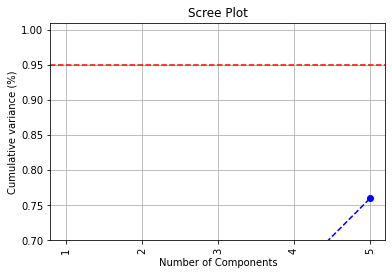

In [ ]:
fig,ax =plt.subplots()
xi=np.arange(1,x.shape[1]+1,1)
yi=np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi,yi,marker='o',linestyle='--',color='b')
plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
ax.set_ylim([0.70, 1.01])
plt.axhline(y=0.95,color='r',linestyle='--')
ax.grid("both")
plt.xticks(rotation=90)
plt.show()

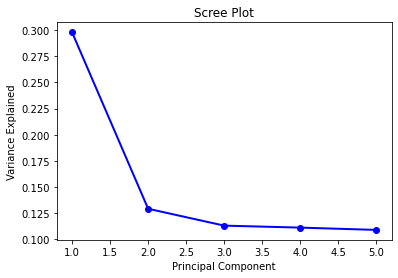

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# 1. Over Sampling

from imblearn.over_sampling import SMOTE # Synthetic Minority Oversample Technique
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [ ]:
# Split the data

from sklearn.model_selection import train_test_split
xo_train,xo_test,yo_train,yo_test=train_test_split(xo,yo,test_size=0.3,random_state=1)

In [ ]:
from random import Random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
KNN_model=KNeighborsClassifier()
SVM_model=SVC()
NB_model=GaussianNB()
RF_model=RandomForestClassifier()
AB_model=AdaBoostClassifier()
lst_model=[KNN_model,SVM_model,NB_model,RF_model,AB_model]

****************************************************************************************************
classification report of KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       939
           1       0.73      0.92      0.82       951

    accuracy                           0.79      1890
   macro avg       0.81      0.79      0.79      1890
weighted avg       0.81      0.79      0.79      1890

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of KNeighborsClassifier()


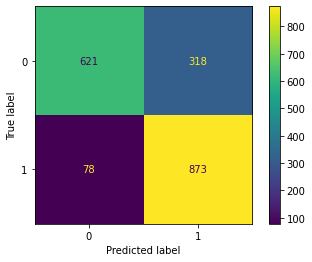

****************************************************************************************************
classification report of SVC()
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       939
           1       0.67      0.65      0.66       951

    accuracy                           0.66      1890
   macro avg       0.66      0.66      0.66      1890
weighted avg       0.66      0.66      0.66      1890

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of SVC()


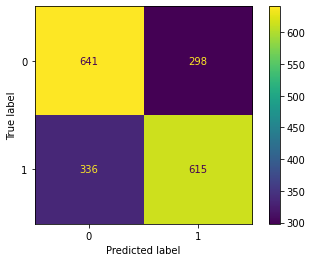

****************************************************************************************************
classification report of GaussianNB()
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       939
           1       0.62      0.55      0.58       951

    accuracy                           0.60      1890
   macro avg       0.60      0.60      0.60      1890
weighted avg       0.60      0.60      0.60      1890

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of GaussianNB()


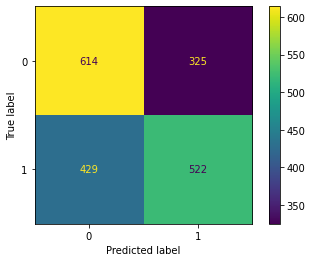

****************************************************************************************************
classification report of RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       939
           1       0.80      0.85      0.82       951

    accuracy                           0.82      1890
   macro avg       0.82      0.82      0.82      1890
weighted avg       0.82      0.82      0.82      1890

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of RandomForestClassifier()


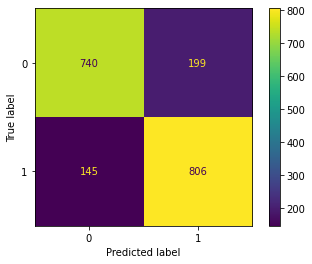

****************************************************************************************************
classification report of AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       939
           1       0.65      0.67      0.66       951

    accuracy                           0.65      1890
   macro avg       0.65      0.65      0.65      1890
weighted avg       0.65      0.65      0.65      1890

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of AdaBoostClassifier()


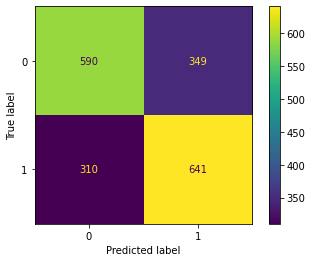

In [ ]:
# Evaluate the efficiancy of the model

from sklearn.metrics import ConfusionMatrixDisplay,classification_report

for i in lst_model:
  i.fit(xo_train,yo_train)
  yo_pred=i.predict(xo_test)
  print('*'*100)
  print('classification report of',i)
  print(classification_report(yo_test,yo_pred))
  print('-'*100)
  print('ConfusionMatrixDisplay of', i)
  print(ConfusionMatrixDisplay.from_predictions(yo_test,yo_pred))
  plt.show()

In [ ]:
# 2. Under Sampling

from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
xu,yu=under.fit_resample(x,y)

In [ ]:
# Split the data

xu_train,xu_test,yu_train,yu_test=train_test_split(xu,yu,test_size=0.3,random_state=1)

****************************************************************************************************
classification report of KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       138
           1       0.60      0.57      0.58       152

    accuracy                           0.57       290
   macro avg       0.57      0.57      0.57       290
weighted avg       0.57      0.57      0.57       290

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of KNeighborsClassifier()


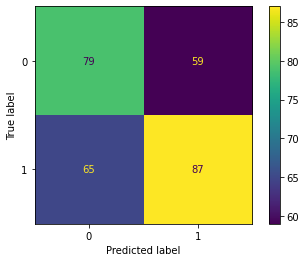

****************************************************************************************************
classification report of SVC()
              precision    recall  f1-score   support

           0       0.55      0.65      0.60       138
           1       0.62      0.52      0.57       152

    accuracy                           0.58       290
   macro avg       0.59      0.59      0.58       290
weighted avg       0.59      0.58      0.58       290

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of SVC()


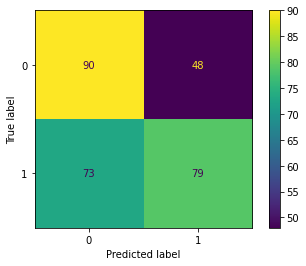

****************************************************************************************************
classification report of GaussianNB()
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       138
           1       0.63      0.47      0.54       152

    accuracy                           0.58       290
   macro avg       0.59      0.59      0.58       290
weighted avg       0.59      0.58      0.57       290

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of GaussianNB()


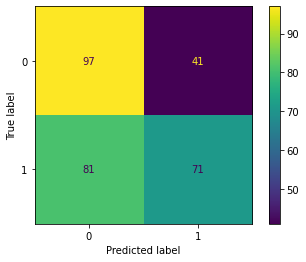

****************************************************************************************************
classification report of RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       138
           1       0.60      0.60      0.60       152

    accuracy                           0.58       290
   macro avg       0.58      0.58      0.58       290
weighted avg       0.58      0.58      0.58       290

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of RandomForestClassifier()


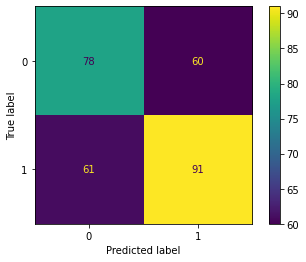

****************************************************************************************************
classification report of AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       138
           1       0.63      0.58      0.60       152

    accuracy                           0.60       290
   macro avg       0.60      0.60      0.60       290
weighted avg       0.61      0.60      0.60       290

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of AdaBoostClassifier()


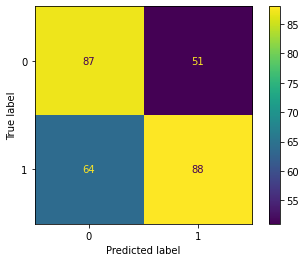

In [ ]:
# Evaluate the efficiancy of the model

for i in lst_model:
  i.fit(xu_train,yu_train)
  yu_pred=i.predict(xu_test)
  print('*'*100)
  print('classification report of',i)
  print(classification_report(yu_test,yu_pred))
  print('-'*100)
  print('ConfusionMatrixDisplay of', i)
  print(ConfusionMatrixDisplay.from_predictions(yu_test,yu_pred))
  plt.show()